In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sms-spam-collection-dataset/spam.csv
/kaggle/input/consumer_complaints/Consumer_Complaints.csv


taking a turn

In [2]:
import pandas as pd
spam = pd.read_csv(r"../input/sms-spam-collection-dataset/spam.csv",encoding = 'latin1')

In [3]:
spam = spam[['v1','v2']]

In [4]:
spam.columns = ['labels','messages']

In [5]:
spam.groupby('labels').describe()

messages                                                               
          count unique                                                top freq
labels                                                                        
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [6]:
spam['length'] = spam['messages'].apply(len)

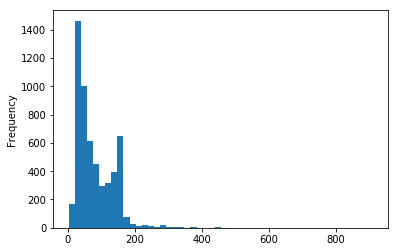

In [7]:
spam['length'].plot(kind = 'hist',bins = 50)

In [8]:
spam['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [9]:
spam[spam['length'] == 910]['messages']

1084    For me the love should start with attraction.i...
Name: messages, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f810868a0b8>,
      dtype=object)

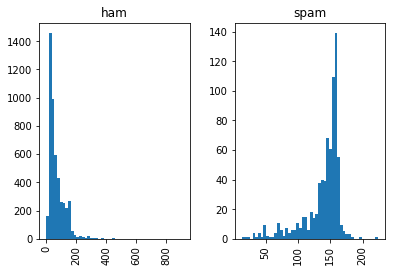

In [10]:
spam.hist(column = 'length',by = 'labels',bins = 50)

In [11]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
spam['messages'] = spam['messages'].apply(lambda x : ''.join([char for char in x if char not in string.punctuation]))
#spam['messages'] = spam['messages'].apply(lambda x : )

In [13]:
from nltk.corpus import stopwords
spam['messages'] = spam['messages'].apply(lambda x : ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer()
bow_transformer.fit(spam['messages'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
mess4 = spam['messages'][3]
mess4

'U dun say early hor U c already say'

In [16]:
print(bow_transformer.transform([mess4]))

  (0, 1147)	1
  (0, 3018)	1
  (0, 3039)	1
  (0, 4226)	1
  (0, 7196)	2


In [17]:
bow_transformer.get_feature_names()[7196]

'say'

In [18]:
ms5 = [spam['messages'][0]]
bow5 = bow_transformer.transform(ms5)

In [19]:
print(bow_transformer.transform(ms5))

  (0, 1174)	1
  (0, 1413)	1
  (0, 1880)	1
  (0, 1882)	1
  (0, 2218)	1
  (0, 2502)	1
  (0, 3792)	1
  (0, 3849)	1
  (0, 3889)	1
  (0, 4695)	1
  (0, 4853)	1
  (0, 6444)	1
  (0, 8956)	1
  (0, 9203)	1


In [20]:
messages_bow = bow_transformer.transform(spam['messages'])

In [21]:
messages_bow.shape

(5572, 9475)

In [22]:
messages_bow.nnz # amount of non zero occurances

51388

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
tfidf_transformer  = TfidfTransformer()
tfidf_transformer.fit(messages_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [25]:
print(tfidf_transformer.transform(bow5))

  (0, 9203)	0.23822187576133733
  (0, 8956)	0.19696340342726038
  (0, 6444)	0.2701917502132373
  (0, 4853)	0.2918335915067389
  (0, 4695)	0.3454453072521403
  (0, 3889)	0.19227005405586492
  (0, 3849)	0.16228382867264401
  (0, 3792)	0.15705625796538664
  (0, 2502)	0.26752361109476797
  (0, 2218)	0.2918335915067389
  (0, 1882)	0.2918335915067389
  (0, 1880)	0.3297648855969494
  (0, 1413)	0.2626832171423389
  (0, 1174)	0.3454453072521403


In [26]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['go']]

4.061168380246842

In [27]:
bow_transformer.vocabulary_['go']

3792

In [28]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['what']] # number to feature dictonary

4.88949033917504

In [29]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [30]:
messages_tfidf.shape

(5572, 9475)

In [31]:
messages_tfidf.nnz

51388

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
naive_bays = MultinomialNB()
spam_detect_model = naive_bays.fit(messages_tfidf,spam['labels'])

In [34]:
message = [spam['messages'][56]]

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer.transform(bow_transformer.transform(message))

<1x9475 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [36]:
spam_detect_model.predict(tfidf_transformer.transform(bow_transformer.transform(message)))

array(['spam'], dtype='<U4')

In [37]:
spam['messages'][666]

'Carlosll minute still need buy'

In [38]:
[spam['messages'][56]]

['Congrats 1 year special cinema pass 2 call 09061209465 C Suprman V Matrix3 StarWars3 etc 4 FREE bx420ip45we 150pm Dont miss']

In [39]:
spam_detect_model.predict(tfidf_transformer.transform(bow_transformer.transform([spam['messages'][56]])))

array(['spam'], dtype='<U4')

In [40]:
pred = spam_detect_model.predict(messages_tfidf)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(pred,spam['labels']))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      4938
        spam       0.85      1.00      0.92       634

    accuracy                           0.98      5572
   macro avg       0.92      0.99      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [43]:
spam

,labels,messages,length
0,ham,Go jurong point crazy Available bugis n great ...,111
1,ham,Ok lar Joking wif u oni,29
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,ham,U dun say early hor U c already say,49
4,ham,Nah I dont think goes usf lives around though,61
...,...,...,...
5567,spam,This 2nd time tried 2 contact u U å£750 Pound ...,161
5568,ham,Will Ì b going esplanade fr home,37
5569,ham,Pity mood Soany suggestions,57
5570,ham,The guy bitching I acted like id interested bu...,125


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [45]:
X_train,X_test,y_train,y_test = train_test_split(spam['messages'],spam['labels'],test_size = 0.2)

In [46]:
#clf = Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('naive_bays',MultinomialNB())])
clf = Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('nbclass',MultinomialNB())],verbose = True)

In [47]:
clf.fit(X_train,y_train)

[Pipeline] ............... (step 1 of 3) Processing bow, total=   0.1s
[Pipeline] ............. (step 2 of 3) Processing tfidf, total=   0.0s
[Pipeline] ........... (step 3 of 3) Processing nbclass, total=   0.0s


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('nbclass',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=True)

In [48]:
pred = clf.predict(X_test)

In [49]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1015
        spam       0.68      1.00      0.81       100

    accuracy                           0.96      1115
   macro avg       0.84      0.98      0.89      1115
weighted avg       0.97      0.96      0.96      1115

